## Example notebook to show how to use graph builder package

#### Importing data

data_tools.fetch_data can be used to fetch data from an API. It builds a data structure of the following form:
    
    - Dict{ function_name : Hexel} where Hexel has as attributes function, best_pairings, description, github commit and color.


In [1]:
import data_tools
import denoiser
from IPPMBuilder import IPPMBuilder
from IPPMPlotter import IPPMPlotter

hexels = data_tools.fetch_data('https://kymata.org/api/datasets/8')

#### Plotting data

stem_plot is a useful function to plot all of the data in hexels. Takes the hexels data structure illustrated above as input along with title.

Skipping left for Z72XN


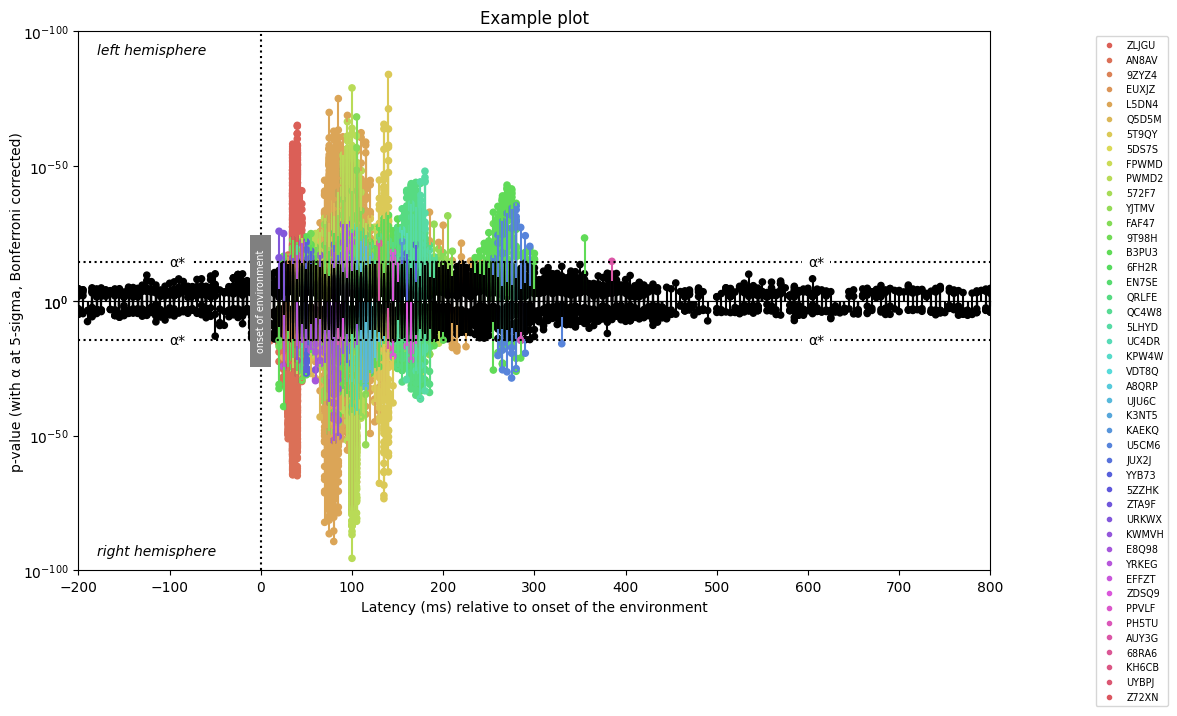

In [2]:
data_tools.stem_plot(hexels, 'Example plot')

#### Denoising

The first iteration of the denoiser is a max pooling strategy. It partitions the x-axis into bins and looks for clusters of spikes in each bin for each function. If a cluster is found, it takes the maximum. The returned hexels have the best_pairings reduced significantly.

In [3]:
pooler = denoiser.MaxPooler()
denoised_hexels = pooler.denoise(hexels, num_clusters=10, bin_sz=20)

Skipping right for ZLJGU
Skipping left for AN8AV
Skipping left for 9ZYZ4
Skipping left for 5DS7S
Skipping left for 572F7
Skipping left for 9T98H
Skipping left for 6FH2R
Skipping left for QC4W8
Skipping right for 5LHYD
Skipping left for UC4DR
Skipping left for KPW4W
Skipping left for VDT8Q
Skipping left for A8QRP
Skipping left for UJU6C
Skipping left for K3NT5
Skipping left for KAEKQ
Skipping right for U5CM6
Skipping left for JUX2J
Skipping left for YYB73
Skipping left for 5ZZHK
Skipping left for ZTA9F
Skipping left for URKWX
Skipping left for E8Q98
Skipping left for YRKEG
Skipping left for EFFZT
Skipping left for ZDSQ9
Skipping left for PPVLF
Skipping left for PH5TU
Skipping left for AUY3G
Skipping left for 68RA6
Skipping left for KH6CB
Skipping left for UYBPJ
Skipping left for Z72XN


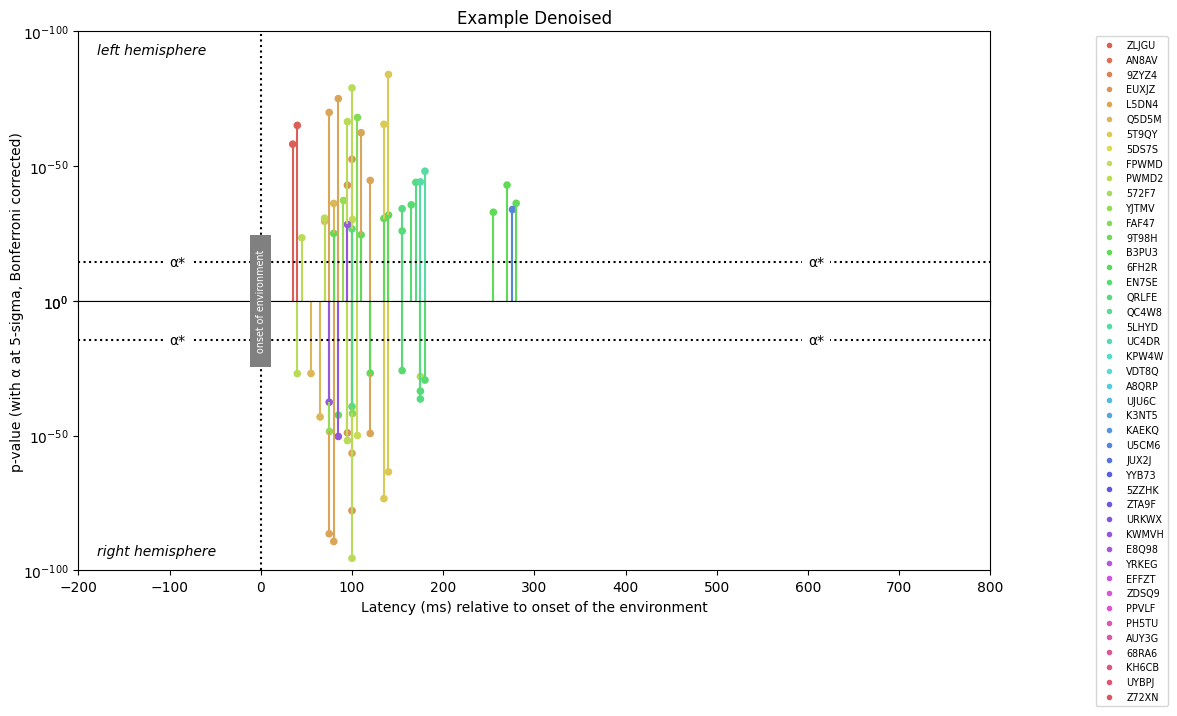

In [4]:
data_tools.stem_plot(denoised_hexels, 'Example Denoised')

#### Generating the Directed Graph

To generate a graph, we need relations between functions, in the form of a function hierarchy. It is 
a dictionary containing function names with their children. Furthermore, this dictionary needs to
contain the input function too. 

An additional input is the list of input functions. This is so we can differentiate between the spikes and inputs. Finally, it also takes the hemisphere and and title as input.

The result graph has as the y-axis the latency of spike, x-axis as class partitions, and node sizes as the magnitude of the spike. 

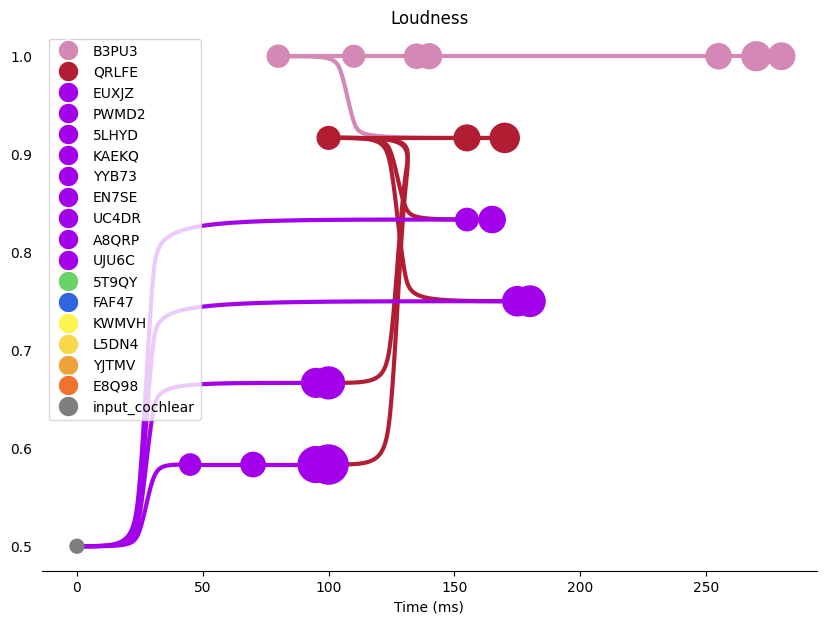

In [5]:
inputs = ['input_cochlear']
function_hier = {
        # assumption: we have a list of functions and their children function
        'B3PU3' : ['QRLFE'],
        'QRLFE' : ['EUXJZ', 'PWMD2', '5LHYD', 'KAEKQ', 'YYB73', 'EN7SE', 'UC4DR', 'A8QRP', 'UJU6C'],
        'EUXJZ' : ['input_cochlear'],
        'PWMD2' : ['input_cochlear'],
        '5LHYD' : ['input_cochlear'],
        'KAEKQ' : ['input_cochlear'],
        'YYB73' : ['input_cochlear'],
        'EN7SE' : ['input_cochlear'],
        'UC4DR' : ['input_cochlear'],
        'A8QRP' : ['input_cochlear'],
        'UJU6C' : ['input_cochlear'],
        'input_cochlear' : []
    }
function_colour_overrides = {
        # Functions and their colours to match the figures
        'B3PU3' : '#d388b5',
        'QRLFE' : '#b11e34',
        'EUXJZ' : '#a201e9',
        'PWMD2' : '#a201e9',
        '5LHYD' : '#a201e9',
        'KAEKQ' : '#a201e9',
        'YYB73' : '#a201e9',
        'EN7SE' : '#a201e9',
        'UC4DR' : '#a201e9',
        'A8QRP' : '#a201e9',
        'UJU6C' : '#a201e9',
        '5T9QY' : '#68d366',
        'FAF47' : '#3165e0',
        'KWMVH' : '#fdf351',
        'L5DN4' : '#f8d748',
        'YJTMV' : '#eda13a',
        'E8Q98' : '#ed732e',
        'input_cochlear' : '#7e7e7e'
    }
builder = IPPMBuilder()
plotter = IPPMPlotter()
graph_dict = builder.build_graph(denoised_hexels, function_hier, inputs, 'leftHemisphere')
plotter.draw(graph_dict, function_colour_overrides, 'Loudness', 7, 10)